# Agenda

1. Sorting
2. Strings and series
3. Plotting 
4. Data frames
     - Defining
     - Reading data from files into them
     - Sorting
     - Grouping
     - Pivot tables
     - Plotting

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
%matplotlib inline

In [5]:
np.random.seed(0)
s = Series(np.random.randint(0, 100, 10),
          index=list('fhiabjcgde'))
s

f    44
h    47
i    64
a    67
b    67
j     9
c    83
g    21
d    36
e    87
dtype: int64

In [6]:
# how can I sort these?

# in Python, the sorted() function uses "TimSort"

# we can sort a series by its index (sort_index), or by its values (sort_values)

In [7]:
help(s.sort_index)

Help on method sort_index in module pandas.core.series:

sort_index(axis=0, level=None, ascending: 'bool | int | Sequence[bool | int]' = True, inplace: 'bool' = False, kind: 'str' = 'quicksort', na_position: 'str' = 'last', sort_remaining: 'bool' = True, ignore_index: 'bool' = False, key: 'IndexKeyFunc' = None) method of pandas.core.series.Series instance
    Sort Series by index labels.
    
    Returns a new Series sorted by label if `inplace` argument is
    ``False``, otherwise updates the original series and returns None.
    
    Parameters
    ----------
    axis : int, default 0
        Axis to direct sorting. This can only be 0 for Series.
    level : int, optional
        If not None, sort on values in specified index level(s).
    ascending : bool or list-like of bools, default True
        Sort ascending vs. descending. When the index is a MultiIndex the
        sort direction can be controlled for each level individually.
    inplace : bool, default False
        If True, 

In [8]:
s.sort_index()

a    67
b    67
c    83
d    36
e    87
f    44
g    21
h    47
i    64
j     9
dtype: int64

In [9]:
s.sort_values()

j     9
g    21
d    36
f    44
h    47
i    64
a    67
b    67
c    83
e    87
dtype: int64

# Strings

In [10]:
a = np.array('this is a test'.split())
a

array(['this', 'is', 'a', 'test'], dtype='<U4')

In [11]:
s = Series('this is a test'.split())
s

0    this
1      is
2       a
3    test
dtype: object

In [12]:
pd.NA

<NA>

In [13]:
pd.StringDtype

pandas.core.arrays.string_.StringDtype

In [14]:
s

0    this
1      is
2       a
3    test
dtype: object

In [16]:
# I want to know how long each string (element) is in s

# option 1: for loop.  DO NOT DO THIS!
sum([len(one_word)
for one_word in s])

11

In [17]:
# option 2: use the str accessor in Pandas
# meaning: Each series has a .str attribute.  Via that attribute, we can invoke many methods 

s.str.len()   # this invokes "len" on each element of s, returning a new series

0    4
1    2
2    1
3    4
dtype: int64

In [18]:
# what is the total length of characters in all of our words?
# s.str.len() returned a series

s.str.len().sum()   # calculate the lengths, then sum them up

11

In [19]:
s.str.isdigit()  # this returns True if all characters in a string are digits (0-9)

0    False
1    False
2    False
3    False
dtype: bool

In [20]:
s.str.contains('e')   # which words contain the character 'e'?

0    False
1    False
2    False
3     True
dtype: bool

In [21]:
# str.contains supports regular expressions!  
# https://RegexpCrashCourse.com/

# Exercise: Strings in series

1. Create a series with 10 strings (words). Try to have them vary in length.
2. Find all of the words whose lengths are < the mean word length.
3. Find all the words that contain both 'a' and 'e'.  (It might be empty!)


In [22]:
s = Series('this is a very exciting and interesting example series is it not'.split())
s

0            this
1              is
2               a
3            very
4        exciting
5             and
6     interesting
7         example
8          series
9              is
10             it
11            not
dtype: object

In [23]:
s.str.len()

0      4
1      2
2      1
3      4
4      8
5      3
6     11
7      7
8      6
9      2
10     2
11     3
dtype: int64

In [26]:
s[s.str.len() < s.str.len().mean()]

0     this
1       is
2        a
3     very
5      and
9       is
10      it
11     not
dtype: object

In [29]:
# find words that contain both 'a' and 'e'
s[s.str.contains('a') & s.str.contains('e')]

7    example
dtype: object

In [32]:
# how often does each word length appear in my series?
# we can use "value_counts", a method that runs on a series

# the result of value_counts is a series s:
# - the index to the series contains the unique values from s
# - the values in the series contain the (sorted, descending order) count for each value in s
s.str.len().value_counts()

2     3
4     2
3     2
1     1
8     1
11    1
7     1
6     1
dtype: int64

In [33]:
s.str.len().value_counts(normalize=True)   # return percentages, not numbers

2     0.250000
4     0.166667
3     0.166667
1     0.083333
8     0.083333
11    0.083333
7     0.083333
6     0.083333
dtype: float64

In [34]:
s = Series(['apple', 'apple', 'banana', 'apple', 'banana', 'apple', 'cherry', 'cherry', 'banana'])
s

0     apple
1     apple
2    banana
3     apple
4    banana
5     apple
6    cherry
7    cherry
8    banana
dtype: object

In [35]:
s.value_counts()

apple     4
banana    3
cherry    2
dtype: int64

In [36]:
s.unique()

array(['apple', 'banana', 'cherry'], dtype=object)

# Plotting

<AxesSubplot:>

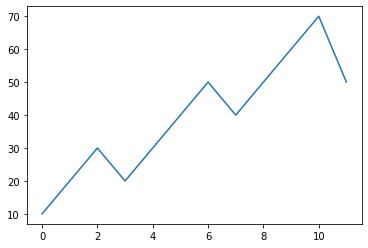

In [38]:
s = Series([10, 20, 30, 20, 30, 40, 50, 40, 50, 60, 70, 50])
s.plot.line()    # create a line plot from our series (because of "inline", show it in the browser)

<AxesSubplot:title={'center':'My amazing plot'}>

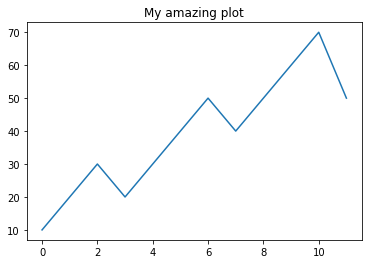

In [39]:
# customize this plot

s.plot.line(title='My amazing plot')

<AxesSubplot:title={'center':'My amazing plot'}>

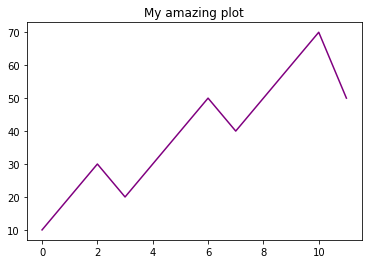

In [40]:
s.plot.line(title='My amazing plot', color='purple')

<AxesSubplot:title={'center':'My amazing plot'}>

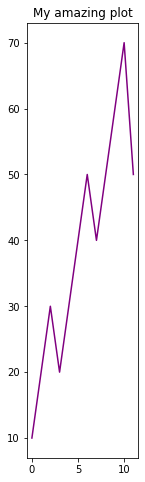

In [44]:
#                                                          (width,height)
s.plot.line(title='My amazing plot', color='purple', figsize=(2,8)) # figsize takes (inches, inches)

<AxesSubplot:>

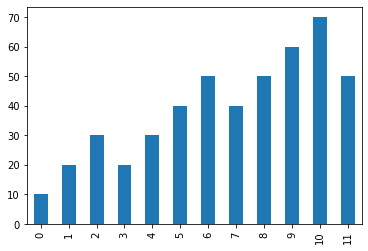

In [45]:
# bar plot!
s.plot.bar()

<AxesSubplot:>

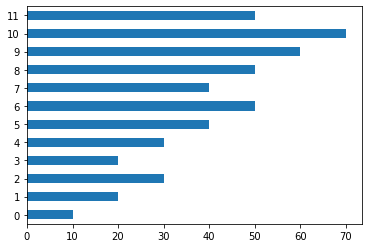

In [46]:
s.plot.barh()

<AxesSubplot:>

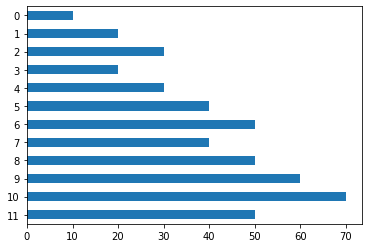

In [47]:
s.sort_index(ascending=False).plot.barh()

<AxesSubplot:ylabel='Frequency'>

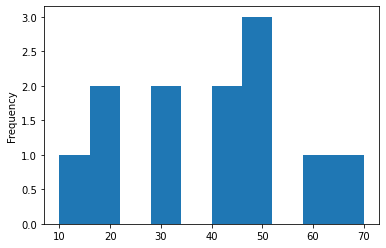

In [48]:
# histogram -- divide our data into 10 buckets. plot the size (height) of each bucket,
# with the height representing how many there were

s.plot.hist()

In [49]:
s

0     10
1     20
2     30
3     20
4     30
5     40
6     50
7     40
8     50
9     60
10    70
11    50
dtype: int64

In [50]:
s.value_counts()

50    3
20    2
30    2
40    2
10    1
60    1
70    1
dtype: int64

In [51]:
# descriptive statistics -- John Tewkey
s.describe()

count    12.000000
mean     39.166667
std      17.816404
min      10.000000
25%      27.500000
50%      40.000000
75%      50.000000
max      70.000000
dtype: float64

<AxesSubplot:>

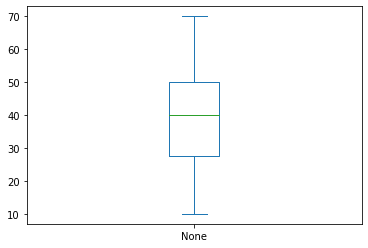

In [52]:
# we can get a visual version of describe, with "box and whiskers plots"

s.plot.box()

<AxesSubplot:ylabel='None'>

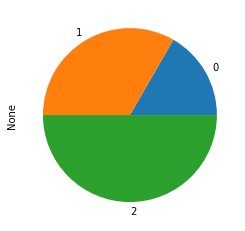

In [53]:
s = Series([10, 20, 30])

s.plot.pie()   # total the values, show what proportion each element contributed to the total

In [54]:
# it's common to create a pie plot based on the output from value_counts
# meaning: call value_counts, which gives you a series, showing how often each value was there
# turn that series into a pie plot.

# Exercise: Weather plotting

1. Get the weather report for your city over the coming 10 days, and create a series with the high temperatures. This index should contain the dates ('YYMMDD').
2. Create a line plot for the temperatures. 
3. Create a pie plot, showing how often each temperature appears in the 10-day forecast. 
4. Create a box plot with the temperatures. What are the minimum, maximum, and median (50%) temperatures? Compare this with the call to "describe" -- which makes more sense to you?

In [55]:
s = Series([18, 17, 15, 16, 17, 18, 15, 14, 14, 13],
          index='1214 1215 1216 1217 1218 1219 1220 1221 1222 1223'.split())
s

1214    18
1215    17
1216    15
1217    16
1218    17
1219    18
1220    15
1221    14
1222    14
1223    13
dtype: int64

<AxesSubplot:>

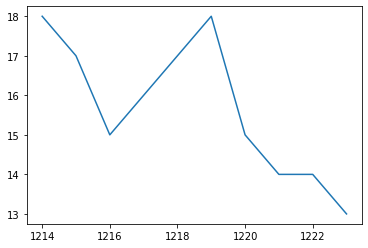

In [56]:
s.plot.line()

<AxesSubplot:ylabel='None'>

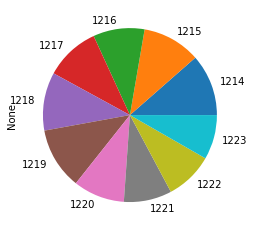

In [57]:
# let's total the temperatures for the next 10 days, then show
# how much of that total belongs to each day.

s.plot.pie()

<AxesSubplot:ylabel='None'>

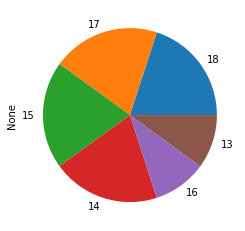

In [59]:
s.value_counts().plot.pie()

In [60]:
s.describe()

count    10.000000
mean     15.700000
std       1.766981
min      13.000000
25%      14.250000
50%      15.500000
75%      17.000000
max      18.000000
dtype: float64

<AxesSubplot:>

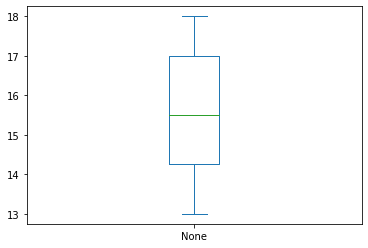

In [61]:
s.plot.box()

In [62]:
# sometimes, box plots can get weird
s

1214    18
1215    17
1216    15
1217    16
1218    17
1219    18
1220    15
1221    14
1222    14
1223    13
dtype: int64

In [63]:
s.loc['1219'] = 30
s

1214    18
1215    17
1216    15
1217    16
1218    17
1219    30
1220    15
1221    14
1222    14
1223    13
dtype: int64

<AxesSubplot:>

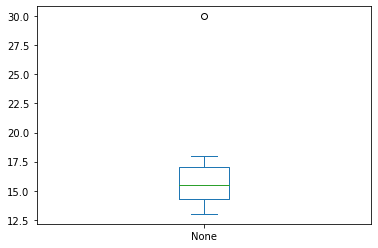

In [64]:
s.plot.box()

In [65]:
s.describe()

count    10.000000
mean     16.900000
std       4.863698
min      13.000000
25%      14.250000
50%      15.500000
75%      17.000000
max      30.000000
dtype: float64

In [67]:
(17 - 14.25) * 2

5.5

# Data frames!

A data frame is a 2D data structure. It has columns and rows. The columns have names, and the rows have the index (which can be names). Overall, we can think of a data frame as a bunch of columns, each of which is a series object. So the dtypes will mostly be in columns, not in rows.

In [70]:
# creating a data frame

# list of lists!
df = DataFrame([[10, 20, 30, 40],
               [50, 60, 70, 80],
               [90, 100, 110, 120],
               [130, 140, 150, 160]],
              index=list('wxyz'),
              columns=list('abcd'))
df

,a,b,c,d
w,10,20,30,40
x,50,60,70,80
y,90,100,110,120
z,130,140,150,160


In [71]:
# the above data frame has 4 rows (identified by the index, w/x/y/z, aka df.index)
df.index

Index(['w', 'x', 'y', 'z'], dtype='object')

In [72]:
# we can get the columns names via "columns"
df.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

In [74]:
# creating a data frame

# list of lists!
np.random.seed(0)
df = DataFrame(np.random.randint(0, 100, [4,4]),
               index=list('wxyz'),
              columns=list('abcd'))
df

,a,b,c,d
w,44,47,64,67
x,67,9,83,21
y,36,87,70,88
z,88,12,58,65


In [75]:
# how can I retrieve from my data frame?

# from the index, it's *JUST LIKE* a series -- make sure to use .loc and .iloc, though
df.loc['x']

a    67
b     9
c    83
d    21
Name: x, dtype: int64

In [76]:
# fancy indexing to retrieve more than one
df.loc[['w', 'z']]

,a,b,c,d
w,44,47,64,67
z,88,12,58,65


In [77]:
df.iloc[[0, 3]]   # fancy indexing based on position

,a,b,c,d
w,44,47,64,67
z,88,12,58,65


In [78]:
# retrieve a column with []
df['a']

w    44
x    67
y    36
z    88
Name: a, dtype: int64

In [79]:
df[['a', 'c']]

,a,c
w,44,64
x,67,83
y,36,70
z,88,58


In [80]:
# what if I want to combine these?
# I want row w, column c

# I can use .loc, and pass it a second argument in the []
df.loc['w', 'c']

64

In [81]:
df.loc[['w', 'z'], 'c']

w    64
z    58
Name: c, dtype: int64

In [82]:
#         rows      columns
df.loc[['w', 'z'], ['b', 'd']]

,b,d
w,47,67
z,12,65


In [83]:
# can I use this syntax to retrieve things?
df.loc['w']['c']

64

In [84]:
# let's assign a value back to the data frame
df.loc['w']['c'] = 99

In [85]:
df

,a,b,c,d
w,44,47,99,67
x,67,9,83,21
y,36,87,70,88
z,88,12,58,65


In [87]:
# don't do this!
# the reason is: You will (at some point) get a warning.
# the warning will say that your assignment might not have actually worked

# if we assign to ['y']['b'], we might be assigning back to df
# but we also might be assigning to the interim data structure that 
# was created when we did our query

df.loc['y']['b'] = 100

In [88]:
# the right way to assign to a data frame is with .loc and *ONE* set of square brackets
df.loc['y', 'b'] = 200

# Exercise: Data frames

1. Create a 5x5 data frame in which the rows are `abcde` and the columns are `vwxyz`. The values should be random integers from 0-1,000.
2. Retrieve row `b`.
3. Retrieve rows `b` and `d`.
4. Retrieve rows `b`, `c`, and `d`.
5. Retrieve column `w`
6. Retieve columns `w` and `y`.
7. Retrieve columns, `w`, `x`, and `y`.
8. Retrieve the item at index `e`, column `v`.
9. Update the item at index `e`, column `v`, to be 123.456.

In [90]:
np.random.seed(0)
df = DataFrame(np.random.randint(0, 1000, [5,5]),
              index=list('abcde'),
              columns=list('vwxyz'))
df

,v,w,x,y,z
a,684,559,629,192,835
b,763,707,359,9,723
c,277,754,804,599,70
d,472,600,396,314,705
e,486,551,87,174,600


In [91]:
# retrieve row b
df.loc['b']

v    763
w    707
x    359
y      9
z    723
Name: b, dtype: int64

In [92]:
df.iloc[1]

v    763
w    707
x    359
y      9
z    723
Name: b, dtype: int64

In [93]:
# retrieve b and d
# fancy indexing
df.loc[['b', 'd']]

,v,w,x,y,z
b,763,707,359,9,723
d,472,600,396,314,705


In [94]:
# fancy indexing, but with positional numbers
df.iloc[[1,3]]

,v,w,x,y,z
b,763,707,359,9,723
d,472,600,396,314,705


In [96]:
# we could use a slice with .loc
# in Pandas, using .loc, with a non-numeric index, slices are up to AND INCLUDING
df.loc['b':'d':2]

,v,w,x,y,z
b,763,707,359,9,723
d,472,600,396,314,705


In [98]:
# slices on numeric ranges are up to AND NOT INCLUDING
df.iloc[1:4:2]

,v,w,x,y,z
b,763,707,359,9,723
d,472,600,396,314,705


In [100]:
# slices on a data frame, handed to [], do *NOT* go to the columns.
# they retrieve based on the rows/index.

df['b':'d':2]

,v,w,x,y,z
b,763,707,359,9,723
d,472,600,396,314,705


In [101]:
# what about b, c, and d?
df['b':'d']

,v,w,x,y,z
b,763,707,359,9,723
c,277,754,804,599,70
d,472,600,396,314,705


In [102]:
df.loc['b':'d']

,v,w,x,y,z
b,763,707,359,9,723
c,277,754,804,599,70
d,472,600,396,314,705


In [103]:
df.loc[['b', 'c', 'd']]

,v,w,x,y,z
b,763,707,359,9,723
c,277,754,804,599,70
d,472,600,396,314,705


In [104]:
df.iloc[1:4]

,v,w,x,y,z
b,763,707,359,9,723
c,277,754,804,599,70
d,472,600,396,314,705


In [105]:
df

,v,w,x,y,z
a,684,559,629,192,835
b,763,707,359,9,723
c,277,754,804,599,70
d,472,600,396,314,705
e,486,551,87,174,600


In [106]:
# retrieve column w

df['w']

a    559
b    707
c    754
d    600
e    551
Name: w, dtype: int64

In [107]:
# you can also use an attribute syntax
df.w

a    559
b    707
c    754
d    600
e    551
Name: w, dtype: int64

In [108]:
# columns 'w' and 'y'
df[['w', 'y']]

,w,y
a,559,192
b,707,9
c,754,599
d,600,314
e,551,174


In [109]:
# can I use a slice to retrieve 'w' and 'y'?
# this doesn't do what we want, because it's looking for *ROWS* 'w' through 'y'
# there's no good answer to this
df['w':'y']

,v,w,x,y,z


In [112]:
# don't do this, but you could...
df[df.columns[1:4:2]]

,w,y
a,559,192
b,707,9
c,754,599
d,600,314
e,551,174


In [113]:
# columns  w, x, and y

df[['w', 'x', 'y']]

,w,x,y
a,559,629,192
b,707,359,9
c,754,804,599
d,600,396,314
e,551,87,174


In [114]:
# get row e, column v

df.loc['e', 'v']

486

In [115]:
# Update the item at e, v to be 123.456

df.loc['e', 'v'] = 123.456

In [117]:
# we see here that when we assign a value to a column, and the column's
# previous dtype could not accommodate that value, the dtype changes!

df

,v,w,x,y,z
a,684.000,559,629,192,835
b,763.000,707,359,9,723
c,277.000,754,804,599,70
d,472.000,600,396,314,705
e,123.456,551,87,174,600


In [120]:
s = Series([10, 20, 30, 40, 50], dtype=np.int32)
s

0    10
1    20
2    30
3    40
4    50
dtype: int32

In [121]:
s.loc[3] = 12.34
s

0    10.00
1    20.00
2    30.00
3    12.34
4    50.00
dtype: float64

In [124]:
df = DataFrame([[1,0.1, 11],
              [5, 0.5, 15],
              [4, 0.4, 14]],
              columns=list('xyz'))
df

,x,y,z
0,1,0.1,11
1,5,0.5,15
2,4,0.4,14


In [125]:
df['x'][1] = 100

/var/folders/rr/0mnyyv811fs5vyp22gf4fxk00000gn/T/ipykernel_4223/2147447848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'][1] = 100


In [126]:
df

,x,y,z
0,1,0.1,11
1,100,0.5,15
2,4,0.4,14


In [ ]:
# always assign with .loc[ROW_SELECT, COLUMN_SELECT]



In [127]:
np.random.seed(0)
df = DataFrame(np.random.randint(0, 1000, [5,5]),
              index=list('abcde'),
              columns=list('vwxyz'))
df

,v,w,x,y,z
a,684,559,629,192,835
b,763,707,359,9,723
c,277,754,804,599,70
d,472,600,396,314,705
e,486,551,87,174,600


In [128]:
df.loc['c', 'y'] = 999
df

,v,w,x,y,z
a,684,559,629,192,835
b,763,707,359,9,723
c,277,754,804,999,70
d,472,600,396,314,705
e,486,551,87,174,600


In [129]:
df.loc[['a', 'b'], ['x', 'y']]

,x,y
a,629,192
b,359,9


In [130]:
# assign multiple elements with .loc on the left
df.loc[['a', 'b'], ['x', 'y']] = 888

In [131]:
df

,v,w,x,y,z
a,684,559,888,888,835
b,763,707,888,888,723
c,277,754,804,999,70
d,472,600,396,314,705
e,486,551,87,174,600


# Next up

1. Boolean indexes and data frames
2. Adding/removing columns and rows
3. Setting and resetting indexes
4. Cleaning data, including `NaN`

Resume at :50

In [132]:
df

,v,w,x,y,z
a,684,559,888,888,835
b,763,707,888,888,723
c,277,754,804,999,70
d,472,600,396,314,705
e,486,551,87,174,600


In [134]:
# create a boolean series based on df['z']
# which elements of df['z'] are > mean?

df['z'][df['z'] > df['z'].mean()]

a    835
b    723
d    705
e    600
Name: z, dtype: int64

In [135]:
# what if I want all of the elements of column y where z is greater than the mean?
df['y'][df['z'] > df['z'].mean()]

a    888
b    888
d    314
e    174
Name: y, dtype: int64

In [136]:
# what if I want all of the rows of df where z is greater than the mean?
df[df['z'] > df['z'].mean()]

,v,w,x,y,z
a,684,559,888,888,835
b,763,707,888,888,723
d,472,600,396,314,705
e,486,551,87,174,600


In [137]:
df['z'].mean()

586.6

In [138]:
df.mean()  # get a value for each column

v    536.4
w    634.2
x    612.6
y    652.6
z    586.6
dtype: float64

In [139]:
df.std()

v    191.774086
w     91.376693
x    357.594463
y    378.987863
z    300.574949
dtype: float64

In [140]:
df.describe()  # gives me descriptive statistics for each column

,v,w,x,y,z
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,536.400000,634.200000,612.600000,652.600000,586.600000
std,191.774086,91.376693,357.594463,378.987863,300.574949
min,277.000000,551.000000,87.000000,174.000000,70.000000
25%,472.000000,559.000000,396.000000,314.000000,600.000000
50%,486.000000,600.000000,804.000000,888.000000,705.000000
75%,684.000000,707.000000,888.000000,888.000000,723.000000
max,763.000000,754.000000,888.000000,999.000000,835.000000


In [142]:
# find where elements of df['w'] are even

# find all rows in df (the data frame) where df['w'] is even
df[df['w'] % 2 == 0]

,v,w,x,y,z
c,277,754,804,999,70
d,472,600,396,314,705


In [145]:
# apply an operator to the entire data frame, not just a column

df % 2 == 0  # boolean data frame

,v,w,x,y,z
a,True,False,True,True,False
b,False,False,True,True,False
c,False,True,True,False,True
d,True,True,True,True,False
e,True,False,False,True,True


In [146]:
# apply our boolean data frame as a make index on df (the entire data frame)

# the result: where the boolean is True, we get the value... otherwise, we get NaN
df[df % 2 == 0]

,v,w,x,y,z
a,684.0,NaN,888.0,888.0,NaN
b,NaN,NaN,888.0,888.0,NaN
c,NaN,754.0,804.0,NaN,70.0
d,472.0,600.0,396.0,314.0,NaN
e,486.0,NaN,NaN,174.0,600.0


In [147]:
df

,v,w,x,y,z
a,684,559,888,888,835
b,763,707,888,888,723
c,277,754,804,999,70
d,472,600,396,314,705
e,486,551,87,174,600


In [148]:
# df.loc[ROW_SELECT, COLUMN_SELECT]

# this is a boolean series, which I can use to select rows
df['w'] % 2 == 0

a    False
b    False
c     True
d     True
e    False
Name: w, dtype: bool

In [151]:
#       row select      list of columns
df.loc[df['w']%2==0,  ['x', 'y']]

,x,y
c,804,999
d,396,314


# Exercise: Retrieval and setting with boolean indexes

1. Create a 5x5 data frame with ints from 0-1,000, index `abcde` and columns `vwxyz`.
2. Which elements of `w` are both even and greater than the mean?
3. Which elements of `v` and `x` correspond to what you found in (2)?
4. Replace the item at `d`, `y` with the mean of column `y`.

In [152]:
np.random.seed(0)
df = DataFrame(np.random.randint(0, 1000, [5,5]),
              index=list('abcde'),
              columns=list('vwxyz'))
df

,v,w,x,y,z
a,684,559,629,192,835
b,763,707,359,9,723
c,277,754,804,599,70
d,472,600,396,314,705
e,486,551,87,174,600


In [156]:
# which elements of w are even + greater than the mean?
df['w'][(df['w']%2==0) &             # where is w even?
        (df['w']>df['w'].mean())]    # where is w > w's mean?

c    754
Name: w, dtype: int64

In [157]:
# my traditional way to do it
df[['v', 'x']][(df['w']%2==0) &             # where is w even?
               (df['w']>df['w'].mean())]    # where is w > w's mean?

,v,x
c,277,804


In [158]:
# my current preferred method
df.loc[(df['w']%2==0) &             
       (df['w']>df['w'].mean()), ['v', 'x']]    

,v,x
c,277,804


In [163]:
# don't do this!
df.loc['d']['y'] = df['y'].mean()

In [164]:
df

,v,w,x,y,z
a,684,559,629,192,835
b,763,707,359,9,723
c,277,754,804,599,70
d,472,600,396,246,705
e,486,551,87,174,600


In [162]:
df['y'].mean()

246.2

In [168]:
# instead, remove the ][ brackets
df.loc['d', 'y'] = df['y'].mean()

In [169]:
df

,v,w,x,y,z
a,684,559,629,192.0,835
b,763,707,359,9.0,723
c,277,754,804,599.0,70
d,472,600,396,243.6,705
e,486,551,87,174.0,600


In [167]:
df['y'].mean()

243.6

In [170]:
# adding and removing rows
# adding and removing columns

df

,v,w,x,y,z
a,684,559,629,192.0,835
b,763,707,359,9.0,723
c,277,754,804,599.0,70
d,472,600,396,243.6,705
e,486,551,87,174.0,600


In [171]:
# add a row by assigning to .loc with that row
# the value needs to be an iterable of the right length

df.loc['f'] = [10, 20, 30, 40, 50]
df

,v,w,x,y,z
a,684,559,629,192.0,835
b,763,707,359,9.0,723
c,277,754,804,599.0,70
d,472,600,396,243.6,705
e,486,551,87,174.0,600
f,10,20,30,40.0,50


In [172]:
# how do we know that the columns have the dtypes?

df.dtypes

v      int64
w      int64
x      int64
y    float64
z      int64
dtype: object

In [173]:
# how can I add a column?
# answer: assign to a column that doesn't yet exist, and make sure the value is
# an iterable of the right length

df['u'] = [100, 200, 300, 400, 500, 600]
df

,v,w,x,y,z,u
a,684,559,629,192.0,835,100
b,763,707,359,9.0,723,200
c,277,754,804,599.0,70,300
d,472,600,396,243.6,705,400
e,486,551,87,174.0,600,500
f,10,20,30,40.0,50,600


In [174]:
# replace a column -- for example, after changing its type
df['u'] = df['u'].astype(np.float64)
df

,v,w,x,y,z,u
a,684,559,629,192.0,835,100.0
b,763,707,359,9.0,723,200.0
c,277,754,804,599.0,70,300.0
d,472,600,396,243.6,705,400.0
e,486,551,87,174.0,600,500.0
f,10,20,30,40.0,50,600.0


In [175]:
# sometimes, we have to remove rows and columns

# how do I remove a row?
# use the df.drop method, naming a row (a string) or a list of rows (list of strings)
# drop doesn't change df, but rather returns a new data frame based on df.
df.drop('f')

,v,w,x,y,z,u
a,684,559,629,192.0,835,100.0
b,763,707,359,9.0,723,200.0
c,277,754,804,599.0,70,300.0
d,472,600,396,243.6,705,400.0
e,486,551,87,174.0,600,500.0


In [176]:
df

,v,w,x,y,z,u
a,684,559,629,192.0,835,100.0
b,763,707,359,9.0,723,200.0
c,277,754,804,599.0,70,300.0
d,472,600,396,243.6,705,400.0
e,486,551,87,174.0,600,500.0
f,10,20,30,40.0,50,600.0


In [177]:
# the real way to remove df['f'] is to assign the result of drop back to df
df = df.drop('f')
df

,v,w,x,y,z,u
a,684,559,629,192.0,835,100.0
b,763,707,359,9.0,723,200.0
c,277,754,804,599.0,70,300.0
d,472,600,396,243.6,705,400.0
e,486,551,87,174.0,600,500.0


In [178]:
# how do we drop a column?
# we use df.drop also!
# we must specify the axis when doing this!
# axis=1 == columns, axis=0 == rows (default)
# or.... say axis='columns' or axis='rows'
df.drop('u', axis=1)

,v,w,x,y,z
a,684,559,629,192.0,835
b,763,707,359,9.0,723
c,277,754,804,599.0,70
d,472,600,396,243.6,705
e,486,551,87,174.0,600


In [179]:
df = df.drop('u', axis='columns')
df

,v,w,x,y,z
a,684,559,629,192.0,835
b,763,707,359,9.0,723
c,277,754,804,599.0,70
d,472,600,396,243.6,705
e,486,551,87,174.0,600


In [186]:
# (1) identifying outliers  (we'll define this to be <mean-std or >mean+std)
# let's start with column v

# remove outliers from column v
df.loc[(df['v'] < df['v'].mean() + df['v'].std()) & 
       (df['v'] > df['v'].mean() - df['v'].std()), 'v']



a    684
d    472
e    486
Name: v, dtype: int64

In [187]:
# (2) removing all rows from df where v is an outlier

df.loc[(df['v'] < df['v'].mean() + df['v'].std()) & 
       (df['v'] > df['v'].mean() - df['v'].std())]

,v,w,x,y,z
a,684,559,629,192.0,835
d,472,600,396,243.6,705
e,486,551,87,174.0,600


# Exercise: Product prices + taxes

1. Create a data frame containing five rows. Each row describes a product. One column will be the name of the product, and another column will be the price of the product.  A third will be the quantity sold.
2. Which product had the greatest number of sales?  
3. Which product had the greatest value of sales?  Add a new column that'll reflect income from this product.
4. How much did we make, total, from all products?
5. Due to a tax change, we need to increase the price of each item by 10%. Change the prices to reflect this.  This means that sales will go down by 10%.  Change the quantity to reflect this.  Recalculate how much the store will make, and print that.

In [189]:
df = DataFrame([['apple', 2, 10],
                ['banana', 1.5, 20],
                ['cucumber', 1, 12],
                ['dill', 0.5, 15],
                ['cellphone', 10, 100]],
              columns=['product', 'price', 'qty_sold'])
df
                

,product,price,qty_sold
0,apple,2.0,10
1,banana,1.5,20
2,cucumber,1.0,12
3,dill,0.5,15
4,cellphone,10.0,100


In [193]:
# which product sold the most?
df.loc[df['qty_sold'] == df['qty_sold'].max(), 'product']

4    cellphone
Name: product, dtype: object

In [195]:
# which product had the greatest value of sales?
# add a new column, income, per product

df['income'] = df['price'] * df['qty_sold']
df

,product,price,qty_sold,income
0,apple,2.0,10,20.0
1,banana,1.5,20,30.0
2,cucumber,1.0,12,12.0
3,dill,0.5,15,7.5
4,cellphone,10.0,100,1000.0


In [197]:
df.loc[df['income'] == df['income'].max(), 'product']

4    cellphone
Name: product, dtype: object

In [198]:
# how much did we make from all products?
# we can just our new column, 'income', and sum it
df['income'].sum()

1069.5

In [200]:
# what if we didn't have the "income" column?
(df['price'] * df['qty_sold']).sum()

1069.5

In [201]:
# increase the price of each item by 10%
# decrease qty_sold by 10%
# recalculate income

df['price'] = df['price'] * 1.1
df['qty_sold'] = df['qty_sold'] * 0.9
df['income'] = df['price'] * df['qty_sold']
df['income'].sum()

1058.805

In [202]:
df

,product,price,qty_sold,income
0,apple,2.20,9.0,19.800
1,banana,1.65,18.0,29.700
2,cucumber,1.10,10.8,11.880
3,dill,0.55,13.5,7.425
4,cellphone,11.00,90.0,990.000


In [203]:
!ls

'Cisco - 2021-12Dec-13-datascience.html'    celebrity_deaths_2016.csv
'Cisco - 2021-12Dec-13-datascience.ipynb'   cisco-2021-12Dec-14.zip
 Cisco-2021-12Dec-14.ipynb		    data-science-exercise-files.zip
 airlines.dat				    languages.csv
 airports				    taxi.csv
 airports.zip				    titanic3.csv
 burrito_current.csv


# Working with files

Pandas knows how to work with a *huge* number of file formats. But the two that are most common are CSV and Excel. CSV is "comma-separated values," meaning that each record is on one line of the file, and fields are separated by commas. I actually like tab-separated values, because it's rarer to have tabs in your data, so you don't need "" around fields.

In [204]:
# exporting data
# If I want to export my data frame, df, to another format, I can do this:

df.to_clipboard()

In [211]:
# we can export to csv with to_csv(filename)
# let's separate with tab!
df.to_csv('mydata.csv', sep='\t')

In [212]:
!cat mydata.csv

	product	price	qty_sold	income
0	apple	2.2	9.0	19.8
1	banana	1.6500000000000001	18.0	29.700000000000003
2	cucumber	1.1	10.8	11.880000000000003
3	dill	0.55	13.5	7.425000000000001
4	cellphone	11.0	90.0	990.0


In [210]:
help(df.to_csv)

Help on method to_csv in module pandas.core.generic:

to_csv(path_or_buf: 'FilePathOrBuffer[AnyStr] | None' = None, sep: 'str' = ',', na_rep: 'str' = '', float_format: 'str | None' = None, columns: 'Sequence[Hashable] | None' = None, header: 'bool_t | list[str]' = True, index: 'bool_t' = True, index_label: 'IndexLabel | None' = None, mode: 'str' = 'w', encoding: 'str | None' = None, compression: 'CompressionOptions' = 'infer', quoting: 'int | None' = None, quotechar: 'str' = '"', line_terminator: 'str | None' = None, chunksize: 'int | None' = None, date_format: 'str | None' = None, doublequote: 'bool_t' = True, escapechar: 'str | None' = None, decimal: 'str' = '.', errors: 'str' = 'strict', storage_options: 'StorageOptions' = None) -> 'str | None' method of pandas.core.frame.DataFrame instance
    Write object to a comma-separated values (csv) file.
    
    Parameters
    ----------
    path_or_buf : str or file handle, default None
        File path or object, if None is provided the

In [214]:
# read our CSV file 
# we don't want to populate/replace an existing data frame with CSV.
# we want to create a *new* data frame.

new_df = pd.read_csv('mydata.csv', sep='\t')
new_df


,Unnamed: 0,product,price,qty_sold,income
0,0,apple,2.20,9.0,19.800
1,1,banana,1.65,18.0,29.700
2,2,cucumber,1.10,10.8,11.880
3,3,dill,0.55,13.5,7.425
4,4,cellphone,11.00,90.0,990.000


In [215]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePathOrBuffer', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=False, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_lines=None, warn_bad_lines=None, on_bad_lines=None, delim_whitespace=False, low_me

In [216]:
# set the index column
new_df = pd.read_csv('mydata.csv', sep='\t',
                    index_col='Unnamed: 0')
new_df

,product,price,qty_sold,income
0,apple,2.20,9.0,19.800
1,banana,1.65,18.0,29.700
2,cucumber,1.10,10.8,11.880
3,dill,0.55,13.5,7.425
4,cellphone,11.00,90.0,990.000


In [217]:
# choose some columns (but not others)
new_df = pd.read_csv('mydata.csv', sep='\t',
                    usecols=['Unnamed: 0', 'product', 'income'],
                    index_col='Unnamed: 0')
new_df

,product,income
0,apple,19.800
1,banana,29.700
2,cucumber,11.880
3,dill,7.425
4,cellphone,990.000


In [218]:
!ls *.csv

burrito_current.csv	   languages.csv  taxi.csv
celebrity_deaths_2016.csv  mydata.csv	  titanic3.csv


In [220]:
df = pd.read_csv('taxi.csv')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30


# Exercise: Taxi data

1. Load data from `taxi.csv` into a data frame. We're only interested in three columns: `passenger_count`, `trip_distance`, and `total_amount`.
2. What was the most common number of passengers in a taxi ride?  What was the least common?
3. Were there any trips that went <= 0 miles? If so, how much did people pay for those trips, on average?
4. Were there any trips that cost <= 0 dollars? If so, how far did people go on those trips?


In [221]:
df.shape

(9999, 19)

In [222]:
df = pd.read_csv('taxi.csv', 
                usecols=['passenger_count', 'trip_distance', 'total_amount'])
df

,passenger_count,trip_distance,total_amount
0,1,1.63,17.80
1,1,0.46,8.30
2,1,0.87,11.00
3,1,2.13,17.16
4,1,1.40,10.30
...,...,...,...
9994,1,2.70,12.30
9995,1,4.50,20.30
9996,1,5.59,22.30
9997,6,1.54,7.80


In [223]:
# most (and least) common number of passengers
df['passenger_count'].value_counts()

1    7207
2    1313
5     520
3     406
6     369
4     182
0       2
Name: passenger_count, dtype: int64

In [230]:
# were there any trips that went <= 0 miles?  How much did people pay for those trips?

df.loc[df['trip_distance'] <= 0, 'total_amount'].mean()

31.581940298507465

In [233]:
df[df['trip_distance'] <= 0].mean()


passenger_count     1.686567
trip_distance       0.000000
total_amount       31.581940
dtype: float64

In [237]:
# were there any trips that cost <= 0 dollars?  How far did they go, on average?

df.loc[df['total_amount'] <= 0, 'trip_distance'].mean()

0.6066666666666667

In [238]:
df.loc[df['total_amount'] <= 0, 'total_amount'].mean()

-6.133333333333333

In [239]:
df.loc[df['total_amount'] <= 0, 'total_amount']

2903   -3.3
5719   -7.8
9276   -7.3
Name: total_amount, dtype: float64

# Next up

- Reading data from files into them (esp. from online)
- Setting + resetting indexes
- Sorting
- Grouping
- Pivot tables
- Plotting

Resume at 1:30 p.m., Eastern

In [240]:
# How do we read from files that aren't on our system?
df = pd.read_csv('https://gist.githubusercontent.com/reuven/bb116ba2034bb10bb7e4e2caa5d8a000/raw/3660c4af808684dbf17af48b3d2f25b6a218535f/CSCO.csv')

In [242]:
df.mean()

/var/folders/rr/0mnyyv811fs5vyp22gf4fxk00000gn/T/ipykernel_4223/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Open         3.965895e+01
High         3.996684e+01
Low          3.946263e+01
Close        3.974789e+01
Adj Close    3.964249e+01
Volume       1.881036e+07
dtype: float64

In [244]:
df.mean(numeric_only=True)

Open         3.965895e+01
High         3.996684e+01
Low          3.946263e+01
Close        3.974789e+01
Adj Close    3.964249e+01
Volume       1.881036e+07
dtype: float64

In [245]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePathOrBuffer', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=False, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_lines=None, warn_bad_lines=None, on_bad_lines=None, delim_whitespace=False, low_me

In [246]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita'

all_dfs = pd.read_html(url)

In [247]:
len(all_dfs)

6

In [249]:
all_dfs[1]

Country/Territory         Subregion    Region   IMF[4]          \
    Country/Territory         Subregion    Region Estimate    Year   
0            Monaco *    Western Europe    Europe      NaN     NaN   
1     Liechtenstein *    Western Europe    Europe      NaN     NaN   
2        Luxembourg *    Western Europe    Europe   131782  2021.0   
3           Bermuda *  Northern America  Americas      NaN     NaN   
4       Switzerland *    Western Europe    Europe    94696  2021.0   
..                ...               ...       ...      ...     ...   
211          Malawi *    Eastern Africa    Africa      432  2021.0   
212      Mozambique *    Eastern Africa    Africa      425  2021.0   
213         Somalia *    Eastern Africa    Africa      347  2021.0   
214     South Sudan *    Eastern Africa    Africa      315  2021.0   
215         Burundi *    Eastern Africa    Africa      265  2021.0   

    United Nations[5]       World Bank[6]          
             Estimate  Year      Estimate    Year  
0            190532.0  2019      190513.0  2019.0  
1            179258.0  2019      180367.0  2018.0  
2            115481.0  2019      115874.0  2020.0  
3            117768.0  2019      117098.0  2019.0  
4             85135.0  2019       86602.0  2020.0  
..                ...   ...           ...     ...  
211             435.0  2019         625.0  2020.0  
212             504.0  2019         449.0  2020.0  
213             105.0  2019         309.0  2020.0  
214             448.0  2019        1120.0  2015.0  
215             260.0  2019         274.0  2020.0  

[216 rows x 9 columns]

In [250]:
df = all_dfs[1]

In [252]:
df.head(10)

Country/Territory         Subregion    Region   IMF[4]          \
  Country/Territory         Subregion    Region Estimate    Year   
0          Monaco *    Western Europe    Europe      NaN     NaN   
1   Liechtenstein *    Western Europe    Europe      NaN     NaN   
2      Luxembourg *    Western Europe    Europe   131782  2021.0   
3         Bermuda *  Northern America  Americas      NaN     NaN   
4     Switzerland *    Western Europe    Europe    94696  2021.0   
5         Ireland *   Northern Europe    Europe    94556  2021.0   
6  Cayman Islands *         Caribbean  Americas      NaN     NaN   
7          Norway *   Northern Europe    Europe    81995  2021.0   
8   United States *  Northern America  Americas    68309  2021.0   
9         Denmark *   Northern Europe    Europe    67218  2021.0   

  United Nations[5]       World Bank[6]          
           Estimate  Year      Estimate    Year  
0          190532.0  2019      190513.0  2019.0  
1          179258.0  2019      180367.0  2018.0  
2          115481.0  2019      115874.0  2020.0  
3          117768.0  2019      117098.0  2019.0  
4           85135.0  2019       86602.0  2020.0  
5           81637.0  2019       83813.0  2020.0  
6           92692.0  2019       91393.0  2019.0  
7           74986.0  2019       67295.0  2020.0  
8           65134.0  2019       63544.0  2020.0  
9           60657.0  2019       60909.0  2020.0

In [253]:
df.columns

MultiIndex([('Country/Territory', 'Country/Territory'),
            (        'Subregion',         'Subregion'),
            (           'Region',            'Region'),
            (           'IMF[4]',          'Estimate'),
            (           'IMF[4]',              'Year'),
            ('United Nations[5]',          'Estimate'),
            ('United Nations[5]',              'Year'),
            (    'World Bank[6]',          'Estimate'),
            (    'World Bank[6]',              'Year')],
           )

In [255]:
df[('IMF[4]', 'Estimate')]

0         NaN
1         NaN
2      131782
3         NaN
4       94696
        ...  
211       432
212       425
213       347
214       315
215       265
Name: (IMF[4], Estimate), Length: 216, dtype: object

In [256]:
# wouldn't it be nice if I could make the country/territory column the index?
# then I'd be able to pull out information based on the country/territory.

# use set_index to choose a column and make it the index of the data frame
# set_index returns a new data frame; it doesn't change df

df.set_index(('Country/Territory', 'Country/Territory'))

Subregion    Region   IMF[4]  \
                                               Subregion    Region Estimate   
(Country/Territory, Country/Territory)                                        
Monaco *                                  Western Europe    Europe      NaN   
Liechtenstein *                           Western Europe    Europe      NaN   
Luxembourg *                              Western Europe    Europe   131782   
Bermuda *                               Northern America  Americas      NaN   
Switzerland *                             Western Europe    Europe    94696   
...                                                  ...       ...      ...   
Malawi *                                  Eastern Africa    Africa      432   
Mozambique *                              Eastern Africa    Africa      425   
Somalia *                                 Eastern Africa    Africa      347   
South Sudan *                             Eastern Africa    Africa      315   
Burundi *                                 Eastern Africa    Africa      265   

                                               United Nations[5]        \
                                          Year          Estimate  Year   
(Country/Territory, Country/Territory)                                   
Monaco *                                   NaN          190532.0  2019   
Liechtenstein *                            NaN          179258.0  2019   
Luxembourg *                            2021.0          115481.0  2019   
Bermuda *                                  NaN          117768.0  2019   
Switzerland *                           2021.0           85135.0  2019   
...                                        ...               ...   ...   
Malawi *                                2021.0             435.0  2019   
Mozambique *                            2021.0             504.0  2019   
Somalia *                               2021.0             105.0  2019   
South Sudan *                           2021.0             448.0  2019   
Burundi *                               2021.0             260.0  2019   

                                       World Bank[6]          
                                            Estimate    Year  
(Country/Territory, Country/Territory)                        
Monaco *                                    190513.0  2019.0  
Liechtenstein *                             180367.0  2018.0  
Luxembourg *                                115874.0  2020.0  
Bermuda *                                   117098.0  2019.0  
Switzerland *                                86602.0  2020.0  
...                                              ...     ...  
Malawi *                                       625.0  2020.0  
Mozambique *                                   449.0  2020.0  
Somalia *                                      309.0  2020.0  
South Sudan *                                 1120.0  2015.0  
Burundi *                                      274.0  2020.0  

[216 rows x 8 columns]

In [257]:
df.head()

Country/Territory         Subregion    Region   IMF[4]          \
  Country/Territory         Subregion    Region Estimate    Year   
0          Monaco *    Western Europe    Europe      NaN     NaN   
1   Liechtenstein *    Western Europe    Europe      NaN     NaN   
2      Luxembourg *    Western Europe    Europe   131782  2021.0   
3         Bermuda *  Northern America  Americas      NaN     NaN   
4     Switzerland *    Western Europe    Europe    94696  2021.0   

  United Nations[5]       World Bank[6]          
           Estimate  Year      Estimate    Year  
0          190532.0  2019      190513.0  2019.0  
1          179258.0  2019      180367.0  2018.0  
2          115481.0  2019      115874.0  2020.0  
3          117768.0  2019      117098.0  2019.0  
4           85135.0  2019       86602.0  2020.0

In [261]:
# strip spaces and * characters from the start/end of every country name

df['country'] = df[('Country/Territory', 'Country/Territory')].str.strip(' *')
df = df.drop(('Country/Territory', 'Country/Territory'), axis='columns')
df.head()

Subregion    Region   IMF[4]         United Nations[5]        \
          Subregion    Region Estimate    Year          Estimate  Year   
0    Western Europe    Europe      NaN     NaN          190532.0  2019   
1    Western Europe    Europe      NaN     NaN          179258.0  2019   
2    Western Europe    Europe   131782  2021.0          115481.0  2019   
3  Northern America  Americas      NaN     NaN          117768.0  2019   
4    Western Europe    Europe    94696  2021.0           85135.0  2019   

  World Bank[6]                 country  
       Estimate    Year                  
0      190513.0  2019.0         Monaco   
1      180367.0  2018.0  Liechtenstein   
2      115874.0  2020.0     Luxembourg   
3      117098.0  2019.0        Bermuda   
4       86602.0  2020.0    Switzerland

In [262]:
df = df.set_index('country')
df.head()

Subregion    Region   IMF[4]         United Nations[5]  \
                       Subregion    Region Estimate    Year          Estimate   
country                                                                         
Monaco            Western Europe    Europe      NaN     NaN          190532.0   
Liechtenstein     Western Europe    Europe      NaN     NaN          179258.0   
Luxembourg        Western Europe    Europe   131782  2021.0          115481.0   
Bermuda         Northern America  Americas      NaN     NaN          117768.0   
Switzerland       Western Europe    Europe    94696  2021.0           85135.0   

                     World Bank[6]          
                Year      Estimate    Year  
country                                     
Monaco          2019      190513.0  2019.0  
Liechtenstein   2019      180367.0  2018.0  
Luxembourg      2019      115874.0  2020.0  
Bermuda         2019      117098.0  2019.0  
Switzerland     2019       86602.0  2020.0

In [263]:
df.columns = ['subregion', 'region', 'IMF_estimate', 'IMF_Year', "UN_estimate", "UN_Year", "WB_estimate", "WB_Year"]

In [264]:
df

,subregion,region,IMF_estimate,IMF_Year,UN_estimate,UN_Year,WB_estimate,WB_Year
country,,,,,,,,
Monaco,Western Europe,Europe,NaN,NaN,190532.0,2019,190513.0,2019.0
Liechtenstein,Western Europe,Europe,NaN,NaN,179258.0,2019,180367.0,2018.0
Luxembourg,Western Europe,Europe,131782,2021.0,115481.0,2019,115874.0,2020.0
Bermuda,Northern America,Americas,NaN,NaN,117768.0,2019,117098.0,2019.0
Switzerland,Western Europe,Europe,94696,2021.0,85135.0,2019,86602.0,2020.0
...,...,...,...,...,...,...,...,...
Malawi,Eastern Africa,Africa,432,2021.0,435.0,2019,625.0,2020.0
Mozambique,Eastern Africa,Africa,425,2021.0,504.0,2019,449.0,2020.0
Somalia,Eastern Africa,Africa,347,2021.0,105.0,2019,309.0,2020.0


In [270]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita'

# get the info for GDP of countries, and put into df
df = pd.read_html(url)[1]

df.columns = ['country', 'subregion', 'region', 'IMF_estimate', 'IMF_Year', "UN_estimate", "UN_Year", "WB_estimate", "WB_Year"]
df['country'] = df['country'].str.strip(' *')
df = df.set_index('country')

In [271]:
df.head()

,subregion,region,IMF_estimate,IMF_Year,UN_estimate,UN_Year,WB_estimate,WB_Year
country,,,,,,,,
Monaco,Western Europe,Europe,NaN,NaN,190532.0,2019,190513.0,2019.0
Liechtenstein,Western Europe,Europe,NaN,NaN,179258.0,2019,180367.0,2018.0
Luxembourg,Western Europe,Europe,131782,2021.0,115481.0,2019,115874.0,2020.0
Bermuda,Northern America,Americas,NaN,NaN,117768.0,2019,117098.0,2019.0
Switzerland,Western Europe,Europe,94696,2021.0,85135.0,2019,86602.0,2020.0


In [272]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita'

# get the info for GDP of countries, and put into df
df = pd.read_html(url)[1]

df.columns = ['country', 'subregion', 'region', 'IMF_estimate', 'IMF_Year', "UN_estimate", "UN_Year", "WB_estimate", "WB_Year"]
df['country'] = df['country'].str.strip(' *')
df = df.set_index(['region', 'subregion', 'country'])

In [274]:
df.head(20)

IMF_estimate  IMF_Year  \
region   subregion                 country                                  
Europe   Western Europe            Monaco                   NaN       NaN   
                                   Liechtenstein            NaN       NaN   
                                   Luxembourg            131782    2021.0   
Americas Northern America          Bermuda                  NaN       NaN   
Europe   Western Europe            Switzerland            94696    2021.0   
         Northern Europe           Ireland                94556    2021.0   
Americas Caribbean                 Cayman Islands           NaN       NaN   
Europe   Northern Europe           Norway                 81995    2021.0   
Americas Northern America          United States          68309    2021.0   
Europe   Northern Europe           Denmark                67218    2021.0   
                                   Iceland                65273    2021.0   
Asia     South-eastern Asia        Singapore              64103    2021.0   
Oceania  Australia and New Zealand Australia              62723    2021.0   
Asia     Western Asia              Qatar                  59143    2021.0   
Europe   Northern Europe           Sweden                 58977    2021.0   
Asia     Eastern Asia              Macau                  58004    2021.0   
Europe   Western Europe            Netherlands            58003    2021.0   
         Northern Europe           Finland                54330    2021.0   
         Western Europe            Austria                53859    2021.0   
Americas Northern America          Greenland                NaN       NaN   

                                                    UN_estimate UN_Year  \
region   subregion                 country                                
Europe   Western Europe            Monaco              190532.0    2019   
                                   Liechtenstein       179258.0    2019   
                                   Luxembourg          115481.0    2019   
Americas Northern America          Bermuda             117768.0    2019   
Europe   Western Europe            Switzerland          85135.0    2019   
         Northern Europe           Ireland              81637.0    2019   
Americas Caribbean                 Cayman Islands       92692.0    2019   
Europe   Northern Europe           Norway               74986.0    2019   
Americas Northern America          United States        65134.0    2019   
Europe   Northern Europe           Denmark              60657.0    2019   
                                   Iceland              71345.0    2019   
Asia     South-eastern Asia        Singapore            64103.0    2019   
Oceania  Australia and New Zealand Australia            54763.0    2019   
Asia     Western Asia              Qatar                64782.0    2019   
Europe   Northern Europe           Sweden               52896.0    2019   
Asia     Eastern Asia              Macau                84097.0    2019   
Europe   Western Europe            Netherlands          53053.0    2019   
         Northern Europe           Finland              48678.0    2019   
         Western Europe            Austria              49701.0    2019   
Americas Northern America          Greenland            53353.0    2019   

                                                    WB_estimate  WB_Year  
region   subregion                 country                                
Europe   Western Europe            Monaco              190513.0   2019.0  
                                   Liechtenstein       180367.0   2018.0  
                                   Luxembourg          115874.0   2020.0  
Americas Northern America          Bermuda             117098.0   2019.0  
Europe   Western Europe            Switzerland          86602.0   2020.0  
         Northern Europe           Ireland              83813.0   2020.0  
Americas Caribbean                 Cayman Islands       91393.0   2019.0  
Europe   Northern Europe      

In [279]:
# Show me the average IMF estimate for all countries in Europe

df.loc['Europe', 'IMF_Year'].mean()

/var/folders/rr/0mnyyv811fs5vyp22gf4fxk00000gn/T/ipykernel_4223/4245178980.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc['Europe', 'IMF_Year'].mean()


2021.0

In [282]:
# with a multi-index, you can name as many levels as you want
# whatever levels you don't name (on the inside) will be in the resulting data frame
# from your query

df.loc[('Europe', 'Western Europe')]

/var/folders/rr/0mnyyv811fs5vyp22gf4fxk00000gn/T/ipykernel_4223/1655546900.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[('Europe', 'Western Europe')]


,IMF_estimate,IMF_Year,UN_estimate,UN_Year,WB_estimate,WB_Year
country,,,,,,
Monaco,NaN,NaN,190532.0,2019,190513.0,2019.0
Liechtenstein,NaN,NaN,179258.0,2019,180367.0,2018.0
Luxembourg,131782,2021.0,115481.0,2019,115874.0,2020.0
Switzerland,94696,2021.0,85135.0,2019,86602.0,2020.0
Netherlands,58003,2021.0,53053.0,2019,52304.0,2020.0
Austria,53859,2021.0,49701.0,2019,48105.0,2020.0
Germany,51860,2021.0,46232.0,2019,45724.0,2020.0
Belgium,50103,2021.0,46198.0,2019,44594.0,2020.0
France,44995,2021.0,40319.0,2019,38625.0,2020.0


In [283]:
# we can use set_index to take a column, and make it the index
# we can similarly use reset_index to take an index column, and make it "normal" again
#  (after that, our index is numeric)
# once again, this returns a new data frame; you need to assign it to df for it to change things

df.reset_index()

,region,subregion,country,IMF_estimate,IMF_Year,UN_estimate,UN_Year,WB_estimate,WB_Year
0,Europe,Western Europe,Monaco,NaN,NaN,190532.0,2019,190513.0,2019.0
1,Europe,Western Europe,Liechtenstein,NaN,NaN,179258.0,2019,180367.0,2018.0
2,Europe,Western Europe,Luxembourg,131782,2021.0,115481.0,2019,115874.0,2020.0
3,Americas,Northern America,Bermuda,NaN,NaN,117768.0,2019,117098.0,2019.0
4,Europe,Western Europe,Switzerland,94696,2021.0,85135.0,2019,86602.0,2020.0
...,...,...,...,...,...,...,...,...,...
211,Africa,Eastern Africa,Malawi,432,2021.0,435.0,2019,625.0,2020.0
212,Africa,Eastern Africa,Mozambique,425,2021.0,504.0,2019,449.0,2020.0
213,Africa,Eastern Africa,Somalia,347,2021.0,105.0,2019,309.0,2020.0
214,Africa,Eastern Africa,South Sudan,315,2021.0,448.0,2019,1120.0,2015.0


# Exercise: GDP estimates

0. `pip install -U lxml`
1. Retrieve, into a data frame, the Wikipedia data about countries' GDP.
2. Rename the columns so that they're not in a multi-index, and their names make more sense.
3. Set the index to be regions.  How would you retrieve the three "year" columns for all countries in Europe?  How about for all countries in both Europe and Africa?
4. Get the descriptive statistics for all numeric "year" columns for the Americas.

In [284]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita'

df = pd.read_html(url)[1]

In [285]:
df.columns

MultiIndex([('Country/Territory', 'Country/Territory'),
            (        'Subregion',         'Subregion'),
            (           'Region',            'Region'),
            (           'IMF[4]',          'Estimate'),
            (           'IMF[4]',              'Year'),
            ('United Nations[5]',          'Estimate'),
            ('United Nations[5]',              'Year'),
            (    'World Bank[6]',          'Estimate'),
            (    'World Bank[6]',              'Year')],
           )

In [286]:
df.columns = ['country', 'subregion', 'region', 'imf_est', 'imf_year', 'un_est', 'un_year', 'wb_est', 'wb_year']

In [287]:
df.head()

,country,subregion,region,imf_est,imf_year,un_est,un_year,wb_est,wb_year
0,Monaco *,Western Europe,Europe,NaN,NaN,190532.0,2019,190513.0,2019.0
1,Liechtenstein *,Western Europe,Europe,NaN,NaN,179258.0,2019,180367.0,2018.0
2,Luxembourg *,Western Europe,Europe,131782,2021.0,115481.0,2019,115874.0,2020.0
3,Bermuda *,Northern America,Americas,NaN,NaN,117768.0,2019,117098.0,2019.0
4,Switzerland *,Western Europe,Europe,94696,2021.0,85135.0,2019,86602.0,2020.0


In [288]:
df = df.set_index('region')
df.head()

,country,subregion,imf_est,imf_year,un_est,un_year,wb_est,wb_year
region,,,,,,,,
Europe,Monaco *,Western Europe,NaN,NaN,190532.0,2019,190513.0,2019.0
Europe,Liechtenstein *,Western Europe,NaN,NaN,179258.0,2019,180367.0,2018.0
Europe,Luxembourg *,Western Europe,131782,2021.0,115481.0,2019,115874.0,2020.0
Americas,Bermuda *,Northern America,NaN,NaN,117768.0,2019,117098.0,2019.0
Europe,Switzerland *,Western Europe,94696,2021.0,85135.0,2019,86602.0,2020.0


In [289]:
df.head(20)

,country,subregion,imf_est,imf_year,un_est,un_year,wb_est,wb_year
region,,,,,,,,
Europe,Monaco *,Western Europe,NaN,NaN,190532.0,2019,190513.0,2019.0
Europe,Liechtenstein *,Western Europe,NaN,NaN,179258.0,2019,180367.0,2018.0
Europe,Luxembourg *,Western Europe,131782,2021.0,115481.0,2019,115874.0,2020.0
Americas,Bermuda *,Northern America,NaN,NaN,117768.0,2019,117098.0,2019.0
Europe,Switzerland *,Western Europe,94696,2021.0,85135.0,2019,86602.0,2020.0
Europe,Ireland *,Northern Europe,94556,2021.0,81637.0,2019,83813.0,2020.0
Americas,Cayman Islands *,Caribbean,NaN,NaN,92692.0,2019,91393.0,2019.0
Europe,Norway *,Northern Europe,81995,2021.0,74986.0,2019,67295.0,2020.0
Americas,United States *,Northern America,68309,2021.0,65134.0,2019,63544.0,2020.0


In [294]:
df.loc['Europe', ['country', 'imf_year', 'un_year', 'wb_year']]

,country,imf_year,un_year,wb_year
region,,,,
Europe,Monaco *,NaN,2019,2019.0
Europe,Liechtenstein *,NaN,2019,2018.0
Europe,Luxembourg *,2021.0,2019,2020.0
Europe,Switzerland *,2021.0,2019,2020.0
Europe,Ireland *,2021.0,2019,2020.0
Europe,Norway *,2021.0,2019,2020.0
Europe,Denmark *,2021.0,2019,2020.0
Europe,Iceland *,2021.0,2019,2020.0
Europe,Sweden *,2021.0,2019,2020.0


In [295]:
df.loc[['Europe', 'Africa'], 
       ['country', 'imf_year', 'un_year', 'wb_year']]

,country,imf_year,un_year,wb_year
region,,,,
Europe,Monaco *,NaN,2019,2019.0
Europe,Liechtenstein *,NaN,2019,2018.0
Europe,Luxembourg *,2021.0,2019,2020.0
Europe,Switzerland *,2021.0,2019,2020.0
Europe,Ireland *,2021.0,2019,2020.0
...,...,...,...,...
Africa,Malawi *,2021.0,2019,2020.0
Africa,Mozambique *,2021.0,2019,2020.0
Africa,Somalia *,2021.0,2019,2020.0


In [297]:
df[['imf_year', 'un_year', 'wb_year']].describe()

,imf_year,wb_year
count,195.0,210.000000
mean,2021.0,2019.500000
std,0.0,2.294679
min,2021.0,2000.000000
25%,2021.0,2020.000000
50%,2021.0,2020.000000
75%,2021.0,2020.000000
max,2021.0,2020.000000


In [298]:
df.head(10)

,country,subregion,imf_est,imf_year,un_est,un_year,wb_est,wb_year
region,,,,,,,,
Europe,Monaco *,Western Europe,NaN,NaN,190532.0,2019,190513.0,2019.0
Europe,Liechtenstein *,Western Europe,NaN,NaN,179258.0,2019,180367.0,2018.0
Europe,Luxembourg *,Western Europe,131782,2021.0,115481.0,2019,115874.0,2020.0
Americas,Bermuda *,Northern America,NaN,NaN,117768.0,2019,117098.0,2019.0
Europe,Switzerland *,Western Europe,94696,2021.0,85135.0,2019,86602.0,2020.0
Europe,Ireland *,Northern Europe,94556,2021.0,81637.0,2019,83813.0,2020.0
Americas,Cayman Islands *,Caribbean,NaN,NaN,92692.0,2019,91393.0,2019.0
Europe,Norway *,Northern Europe,81995,2021.0,74986.0,2019,67295.0,2020.0
Americas,United States *,Northern America,68309,2021.0,65134.0,2019,63544.0,2020.0


In [299]:
df.dtypes

country       object
subregion     object
imf_est       object
imf_year     float64
un_est       float64
un_year       object
wb_est       float64
wb_year      float64
dtype: object

In [302]:
# what if I want to show all of the countries' UN estimates as per this table,
# sorted from highest to lowest?

# I can sort a series with sort_values
df['un_est'].sort_values(ascending=False)

region
Europe      190532.0
Europe      179258.0
Americas    117768.0
Europe      115481.0
Americas     92692.0
              ...   
Africa         105.0
Oceania          NaN
Americas         NaN
Oceania          NaN
Oceania          NaN
Name: un_est, Length: 216, dtype: float64

In [305]:
# what if I want to sort the *entire* data frame based on un_est, from highest to lowest?

df.sort_values('un_est', ascending=False).head(30)

,country,subregion,imf_est,imf_year,un_est,un_year,wb_est,wb_year
region,,,,,,,,
Europe,Monaco *,Western Europe,NaN,NaN,190532.0,2019,190513.0,2019.0
Europe,Liechtenstein *,Western Europe,NaN,NaN,179258.0,2019,180367.0,2018.0
Americas,Bermuda *,Northern America,NaN,NaN,117768.0,2019,117098.0,2019.0
Europe,Luxembourg *,Western Europe,131782,2021.0,115481.0,2019,115874.0,2020.0
Americas,Cayman Islands *,Caribbean,NaN,NaN,92692.0,2019,91393.0,2019.0
Europe,Switzerland *,Western Europe,94696,2021.0,85135.0,2019,86602.0,2020.0
Asia,Macau *,Eastern Asia,58004,2021.0,84097.0,2019,86118.0,2019.0
Europe,Ireland *,Northern Europe,94556,2021.0,81637.0,2019,83813.0,2020.0
Europe,Norway *,Northern Europe,81995,2021.0,74986.0,2019,67295.0,2020.0


In [306]:
# what if I want to sort by country?
df.sort_values('country')

,country,subregion,imf_est,imf_year,un_est,un_year,wb_est,wb_year
region,,,,,,,,
Asia,Afghanistan *,Southern Asia,592,2021.0,470.0,2019,509.0,2020.0
Europe,Albania *,Southern Europe,5991,2021.0,5303.0,2019,5215.0,2020.0
Africa,Algeria *,Northern Africa,3364,2021.0,3976.0,2019,3310.0,2020.0
Oceania,American Samoa *,Polynesia,NaN,NaN,NaN,NaN,11535.0,2019.0
Europe,Andorra *,Southern Europe,NaN,NaN,40887.0,2019,40897.0,2019.0
...,...,...,...,...,...,...,...,...
Asia,Vietnam *,South-eastern Asia,3759,2021.0,2715.0,2019,2786.0,2020.0
World,World,World,NaN,NaN,11339.0,2019,10926.0,2020.0
Asia,Yemen *,Western Asia,754,2021.0,855.0,2019,824.0,2018.0


In [307]:
# I'll unset "region" as the index
df = df.reset_index()



In [308]:
# Can I sort the data first by region, then by subregion, then by country?
# give a list of columns, rather than a single column name/string:

df.sort_values(['region', 'subregion', 'country'])

,region,country,subregion,imf_est,imf_year,un_est,un_year,wb_est,wb_year
215,Africa,Burundi *,Eastern Africa,265,2021.0,260.0,2019,274.0,2020.0
180,Africa,Comoros *,Eastern Africa,1420,2021.0,1370.0,2019,1403.0,2020.0
151,Africa,Djibouti *,Eastern Africa,3214,2021.0,3252.0,2019,3426.0,2020.0
205,Africa,Eritrea *,Eastern Africa,625,2021.0,567.0,2019,643.0,2011.0
193,Africa,Ethiopia *,Eastern Africa,952,2021.0,828.0,2019,936.0,2020.0
...,...,...,...,...,...,...,...,...,...
57,Oceania,French Polynesia *,Polynesia,NaN,NaN,21567.0,2019,14324.0,2000.0
143,Oceania,Samoa *,Polynesia,3672,2021.0,4285.0,2019,4068.0,2020.0
119,Oceania,Tonga *,Polynesia,5081,2021.0,4865.0,2019,4903.0,2019.0
118,Oceania,Tuvalu *,Polynesia,5116,2021.0,4036.0,2019,4143.0,2020.0


In [309]:
# I want to find out the mean UN estimate for GDP
df['un_est'].mean()

17798.283018867925

In [310]:
# I want to know the mean UN estimate for GDP *per region* in the data frame
df['region'].unique()

array(['Europe', 'Americas', 'Asia', 'Oceania', 'World', 'Africa'],
      dtype=object)

In [311]:
df.loc[df['region'] == 'Europe', 'un_est'].mean()

39288.86363636364

In [312]:
df.loc[df['region'] == 'Americas', 'un_est'].mean()

20007.155555555557

In [313]:
df.loc[df['region'] == 'Asia', 'un_est'].mean()

14848.803921568628

# Grouping

Grouping basically means: Run the same aggregate function for each unique value in a particular column. Then report the results per aggregate calculation.

For example: I could get the mean sales for a company. But I could use grouping to get mean sales by region, or by month, or by salesperson.  This requires that we have (at least one) column that has categorical information.

In [317]:
# this means:
# for each distinct region in df,
# calculate the mean un_est

df.groupby('region')['un_est'].mean()

region
Africa       2499.907407
Americas    20007.155556
Asia        14848.803922
Europe      39288.863636
Oceania     14151.823529
World       11339.000000
Name: un_est, dtype: float64

In [319]:
# what if I want both the mean and the std for un_est, for each region in df?
df.groupby('region')['un_est'].agg([np.mean, np.std])

,mean,std
region,,
Africa,2499.907407,3109.126555
Americas,20007.155556,23858.408783
Asia,14848.803922,19555.920210
Europe,39288.863636,41078.253111
Oceania,14151.823529,16131.863071
World,11339.000000,NaN


In [320]:
df.head(20)

,region,country,subregion,imf_est,imf_year,un_est,un_year,wb_est,wb_year
0,Europe,Monaco *,Western Europe,NaN,NaN,190532.0,2019,190513.0,2019.0
1,Europe,Liechtenstein *,Western Europe,NaN,NaN,179258.0,2019,180367.0,2018.0
2,Europe,Luxembourg *,Western Europe,131782,2021.0,115481.0,2019,115874.0,2020.0
3,Americas,Bermuda *,Northern America,NaN,NaN,117768.0,2019,117098.0,2019.0
4,Europe,Switzerland *,Western Europe,94696,2021.0,85135.0,2019,86602.0,2020.0
5,Europe,Ireland *,Northern Europe,94556,2021.0,81637.0,2019,83813.0,2020.0
6,Americas,Cayman Islands *,Caribbean,NaN,NaN,92692.0,2019,91393.0,2019.0
7,Europe,Norway *,Northern Europe,81995,2021.0,74986.0,2019,67295.0,2020.0
8,Americas,United States *,Northern America,68309,2021.0,65134.0,2019,63544.0,2020.0
9,Europe,Denmark *,Northern Europe,67218,2021.0,60657.0,2019,60909.0,2020.0


In [322]:
df = DataFrame([['apple', 'produce', 2, 10],
                ['banana', 'produce', 1.5, 20],
                ['cucumber', 'produce', 1, 12],
                ['dill', 'produce', 0.5, 15],
                ['cellphone', 'electronics', 10, 100],
               ['computer', 'electronics', 20, 1000],
               ['mouse', 'electronics', 5, 200]],
              columns=['product', 'department', 'price', 'qty_sold'])
df
                

,product,department,price,qty_sold
0,apple,produce,2.0,10
1,banana,produce,1.5,20
2,cucumber,produce,1.0,12
3,dill,produce,0.5,15
4,cellphone,electronics,10.0,100
5,computer,electronics,20.0,1000
6,mouse,electronics,5.0,200


In [325]:
# how much did I earn, total, from all sales?
df['revenue'] = df['price'] * df['qty_sold']
df

,product,department,price,qty_sold,revenue
0,apple,produce,2.0,10,20.0
1,banana,produce,1.5,20,30.0
2,cucumber,produce,1.0,12,12.0
3,dill,produce,0.5,15,7.5
4,cellphone,electronics,10.0,100,1000.0
5,computer,electronics,20.0,1000,20000.0
6,mouse,electronics,5.0,200,1000.0


In [326]:
# how much revenue did we get total?
df['revenue'].sum()

22069.5

In [327]:
# how much revenue did we get, PER DEPARTMENT?
# the "department" column has repeated, categorical data

# for each department,
# apply the sum() function
# to the revenue column
df.groupby('department')['revenue'].sum()

department
electronics    22000.0
produce           69.5
Name: revenue, dtype: float64

# Exercise: Taxi reports

1. (Re-)create a data frame from the taxi data, containing `passenger_count`, `trip_distance`, `total_amount`, and `payment_type`.
2. What was the average trip distance for each number of passengers?
3. What was the std of total amount for each number of passengers?
4. Assuming payment types are 1 (cash) and 2 (credit card), did people spend more, on average, with their credit cards, than when using cash?

In [328]:
df = pd.read_csv('taxi.csv',
                usecols=['passenger_count', 'trip_distance', 'total_amount', 'payment_type'])
df.head(10)

,passenger_count,trip_distance,payment_type,total_amount
0,1,1.63,2,17.80
1,1,0.46,1,8.30
2,1,0.87,1,11.00
3,1,2.13,1,17.16
4,1,1.40,2,10.30
5,1,1.40,1,10.55
6,1,1.80,1,16.30
7,4,11.90,1,73.84
8,1,1.27,2,15.80
9,1,0.60,1,6.30


In [331]:
df.groupby('passenger_count')['trip_distance'].mean()

passenger_count
0    4.600000
1    3.092338
2    3.384387
3    3.342389
4    3.628901
5    3.182712
6    3.170976
Name: trip_distance, dtype: float64

In [332]:
df.groupby('passenger_count')['total_amount'].std()

passenger_count
0    15.301791
1    15.286692
2    15.612365
3    13.717839
4    15.097867
5    14.031953
6    13.363827
Name: total_amount, dtype: float64

In [334]:
# what if I want to get for both trip distance and total amount?
df.groupby('passenger_count')[['total_amount', 'trip_distance']].std()

,total_amount,trip_distance
passenger_count,,
0,15.301791,4.666905
1,15.286692,4.020187
2,15.612365,4.242826
3,13.717839,3.822041
4,15.097867,4.351369
5,14.031953,3.969468
6,13.363827,3.759807


In [337]:
# what if I want to get for both trip distance and total amount?
# what if I also want *both* mean and std?
df.groupby('passenger_count')[['total_amount', 'trip_distance']].agg([np.mean, np.std])

total_amount            trip_distance          
                        mean        std          mean       std
passenger_count                                                
0                  25.570000  15.301791      4.600000  4.666905
1                  17.368569  15.286692      3.092338  4.020187
2                  18.406306  15.612365      3.384387  4.242826
3                  17.994704  13.717839      3.342389  3.822041
4                  18.881648  15.097867      3.628901  4.351369
5                  17.211269  14.031953      3.182712  3.969468
6                  17.401355  13.363827      3.170976  3.759807

In [341]:
df.groupby('payment_type')['total_amount'].mean()

payment_type
1    19.968432
2    13.975392
3    14.708235
4     9.950000
Name: total_amount, dtype: float64

# Pivot table

Pivot tables allow us to run aggregate methods (e.g., mean) on every combination of two different categorical columns.

We're going to create a new data frame:
- The index will contain unique values from one categorical column
- The columns will contain unique values from another categorical column
- The values in the table will be the result of running `mean` on this index-column combination

In [342]:
# I'll create a pivot table:
# - index will be passenger counts
# - columns will be payment types
# - values will be the mean trip distance for each combination

df.pivot_table(index='passenger_count', columns='payment_type', values='trip_distance')

payment_type,1,2,3,4
passenger_count,,,,
0,4.600000,NaN,NaN,NaN
1,3.408621,2.613389,1.900968,1.718
2,3.625507,3.016911,11.700000,NaN
3,3.221504,3.493575,NaN,3.600
4,4.161136,3.130638,NaN,NaN
5,3.518750,2.645050,NaN,NaN
6,3.178606,3.161118,NaN,NaN


In [356]:
payment_types = DataFrame([[1, 'cash'],
                           [2, 'credit'],
                           [3, 'refund'],
                           [4, 'other']],
                         columns=['index', 'payment_type']).set_index('index')
payment_types

,payment_type
index,
1,cash
2,credit
3,refund
4,other


In [357]:
df.head()

,passenger_count,trip_distance,payment_type,total_amount
0,1,1.63,2,17.80
1,1,0.46,1,8.30
2,1,0.87,1,11.00
3,1,2.13,1,17.16
4,1,1.40,2,10.30


In [359]:
# instead of
df = df.set_index('payment_type').join(payment_types).reset_index().drop('index', axis='columns')
df

,passenger_count,trip_distance,total_amount,payment_type
0,1,0.46,8.30,cash
1,1,0.87,11.00,cash
2,1,2.13,17.16,cash
3,1,1.40,10.55,cash
4,1,1.80,16.30,cash
...,...,...,...,...
9994,1,4.80,21.30,other
9995,1,1.50,11.30,other
9996,1,0.50,7.80,other
9997,1,0.89,-7.80,other


In [360]:
df.groupby('payment_type')['total_amount'].mean()

payment_type
cash      19.968432
credit    13.975392
other      9.950000
refund    14.708235
Name: total_amount, dtype: float64

# Next up

1. Memory usage in data frames
2. Plotting

Resume at :20

In [362]:
df = DataFrame(np.random.randint(0, 100, [3,4]))
df

,0,1,2,3
0,81,37,25,77
1,72,9,20,80
2,69,79,47,64


In [363]:
# we can get information about the data with df.describe()
df.describe()

,0,1,2,3
count,3.000000,3.000000,3.000000,3.000000
mean,74.000000,41.666667,30.666667,73.666667
std,6.244998,35.232561,14.364308,8.504901
min,69.000000,9.000000,20.000000,64.000000
25%,70.500000,23.000000,22.500000,70.500000
50%,72.000000,37.000000,25.000000,77.000000
75%,76.500000,58.000000,36.000000,78.500000
max,81.000000,79.000000,47.000000,80.000000


In [364]:
# we can get information about the data frame with df.info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3 non-null      int64
 1   1       3 non-null      int64
 2   2       3 non-null      int64
 3   3       3 non-null      int64
dtypes: int64(4)
memory usage: 224.0 bytes


In [365]:
df

,0,1,2,3
0,81,37,25,77
1,72,9,20,80
2,69,79,47,64


In [366]:
3 * 4 * 8

96

In [367]:
224 - 96

128

In [368]:
df = DataFrame(np.random.randint(0, 100, [10,12]))
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,82,99,88,49,29,19,19,14,39,32,65,9
1,57,32,31,74,23,35,75,55,28,34,0,0
2,36,53,5,38,17,79,4,42,58,31,1,65
3,41,57,35,11,46,82,91,0,14,99,53,12
4,42,84,75,68,6,68,47,3,76,52,78,15
5,20,99,58,23,79,13,85,48,49,69,41,35
6,64,95,69,94,0,50,36,34,48,93,3,98
7,42,77,21,73,0,10,43,58,23,59,2,98
8,62,35,94,67,82,46,99,20,81,50,27,14
9,41,58,65,36,10,86,43,11,2,51,80,32


In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       10 non-null     int64
 1   1       10 non-null     int64
 2   2       10 non-null     int64
 3   3       10 non-null     int64
 4   4       10 non-null     int64
 5   5       10 non-null     int64
 6   6       10 non-null     int64
 7   7       10 non-null     int64
 8   8       10 non-null     int64
 9   9       10 non-null     int64
 10  10      10 non-null     int64
 11  11      10 non-null     int64
dtypes: int64(12)
memory usage: 1.1 KB


In [370]:
1100 - (10 * 12 * 8)

140

In [371]:
df = DataFrame(np.random.randint(0, 100, [3,4]),
              index=list('abc'))
df

,0,1,2,3
a,54,0,38,19
b,46,42,56,60
c,77,30,24,2


In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, a to c
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3 non-null      int64
 1   1       3 non-null      int64
 2   2       3 non-null      int64
 3   3       3 non-null      int64
dtypes: int64(4)
memory usage: 120.0+ bytes


In [373]:
df[4] = list('xyz')
df

,0,1,2,3,4
a,54,0,38,19,x
b,46,42,56,60,y
c,77,30,24,2,z


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, a to c
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3 non-null      int64 
 1   1       3 non-null      int64 
 2   2       3 non-null      int64 
 3   3       3 non-null      int64 
 4   4       3 non-null      object
dtypes: int64(4), object(1)
memory usage: 144.0+ bytes


In [375]:
df.loc['a', 4] = 'abcdefghij' * 1_000_000

In [376]:
df

,0,1,2,3,4
a,54,0,38,19,abcdefghijabcdefghijabcdefghijabcdefghijabcdef...
b,46,42,56,60,y
c,77,30,24,2,z


In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, a to c
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3 non-null      int64 
 1   1       3 non-null      int64 
 2   2       3 non-null      int64 
 3   3       3 non-null      int64 
 4   4       3 non-null      object
dtypes: int64(4), object(1)
memory usage: 252.0+ bytes


In [378]:
# if we want to really and truly measure memory usage (especially of strings),
# we need to tell df.info to really and truly go into all objects and measure them
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, a to c
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3 non-null      int64 
 1   1       3 non-null      int64 
 2   2       3 non-null      int64 
 3   3       3 non-null      int64 
 4   4       3 non-null      object
dtypes: int64(4), object(1)
memory usage: 9.5 MB


In [379]:
df = DataFrame([['apple', 'produce', 2, 10],
                ['banana', 'produce', 1.5, 20],
                ['cucumber', 'produce', 1, 12],
                ['dill', 'produce', 0.5, 15],
                ['cellphone', 'electronics', 10, 100],
               ['computer', 'electronics', 20, 1000],
               ['mouse', 'electronics', 5, 200]],
              columns=['product', 'department', 'price', 'qty_sold'])
df
                

,product,department,price,qty_sold
0,apple,produce,2.0,10
1,banana,produce,1.5,20
2,cucumber,produce,1.0,12
3,dill,produce,0.5,15
4,cellphone,electronics,10.0,100
5,computer,electronics,20.0,1000
6,mouse,electronics,5.0,200


In [380]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product     7 non-null      object 
 1   department  7 non-null      object 
 2   price       7 non-null      float64
 3   qty_sold    7 non-null      int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1 KB


In [381]:
# we can ask pandas to turn the "department" column into a *category* column
# what that means: pandas will give each unique value an integer.  The integer
# will actually be in the column. But the column will feel as if it's a string column.

df['department'].astype('category')  # categories are a Pandas feature, not in NumPy

0        produce
1        produce
2        produce
3        produce
4    electronics
5    electronics
6    electronics
Name: department, dtype: category
Categories (2, object): ['electronics', 'produce']

In [384]:
# how can we turn a column into a category column?

df['department'] = df['department'].astype('category')

In [383]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   product     7 non-null      object  
 1   department  7 non-null      category
 2   price       7 non-null      float64 
 3   qty_sold    7 non-null      int64   
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 931.0 bytes


# Plotting with data frames

Generally speaking, any method we can run on a series can also be run on a data frame -- it'll just be run on every column, and we'll get a result from each separate column.

I could plot on a data frame, and get results for each column.



In [385]:
df

,product,department,price,qty_sold
0,apple,produce,2.0,10
1,banana,produce,1.5,20
2,cucumber,produce,1.0,12
3,dill,produce,0.5,15
4,cellphone,electronics,10.0,100
5,computer,electronics,20.0,1000
6,mouse,electronics,5.0,200


<AxesSubplot:>

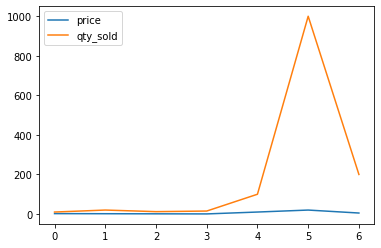

In [386]:
df.plot.line()

<AxesSubplot:>

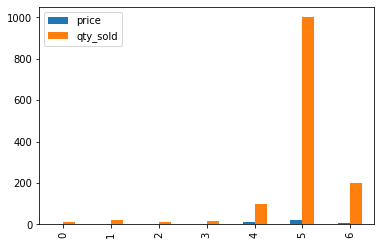

In [387]:
df.plot.bar()

In [388]:
# I can reduce the columns by calling .plot.bar on a subset of df
# I can reduce the rows by calling .plot.bar on a slice of df (which restricts rows)

In [389]:
df

,product,department,price,qty_sold
0,apple,produce,2.0,10
1,banana,produce,1.5,20
2,cucumber,produce,1.0,12
3,dill,produce,0.5,15
4,cellphone,electronics,10.0,100
5,computer,electronics,20.0,1000
6,mouse,electronics,5.0,200


In [390]:
df['tax'] = df['price'] * 0.1
df

,product,department,price,qty_sold,tax
0,apple,produce,2.0,10,0.20
1,banana,produce,1.5,20,0.15
2,cucumber,produce,1.0,12,0.10
3,dill,produce,0.5,15,0.05
4,cellphone,electronics,10.0,100,1.00
5,computer,electronics,20.0,1000,2.00
6,mouse,electronics,5.0,200,0.50


<AxesSubplot:>

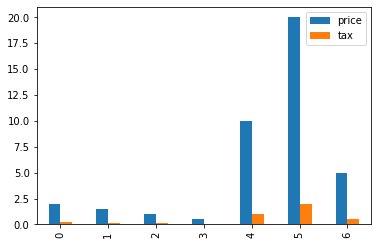

In [391]:
# the price on an item will be price + tax
# I want a bar plot of price and tax, next to one another

df[['price', 'tax']].plot.bar()

<AxesSubplot:>

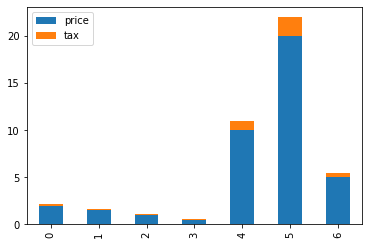

In [392]:
# This helps us see how much the tax is, relative to the price of an item,
# but we want to see the combination of price + tax. How can we do that?

df[['price', 'tax']].plot.bar(stacked=True)

<AxesSubplot:xlabel='price', ylabel='tax'>

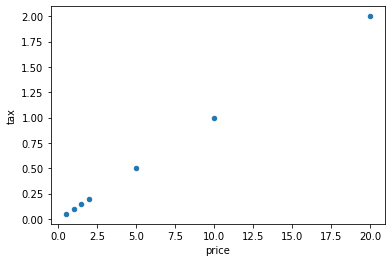

In [394]:
# scatter plot

# in a scatter plot, we choose one column to be the x axis and another column to be the axis
# we ask Pandas to plot, for every data point, a point on those axes showing the x and y value.

# this allows us to see if there's a correlation -- meaning, if as the x value goes up, 
# the y value consistently goes up by the same proportion.

df.plot.scatter(x='price', y='tax')

In [395]:
# visually, a scatter plot is great for checking correlations
# if you want something that's more scientifically rigorous, we can use the .corr() method

df.corr()  # for every combination of numeric columns, how correlated are they with the others?

,price,qty_sold,tax
price,1.00000,0.92513,1.00000
qty_sold,0.92513,1.00000,0.92513
tax,1.00000,0.92513,1.00000


# Exercise: Correlations and plotting

1. We're going to (once again) use our taxi data, with `passenger_count`, `trip_distance`, `mta_tax`, `tip_amount`, `fare_amount`, and  `total_amount`.
2. Create a pie plot of `passenger_count`, showing how many rides had each number of passengers.
3. Produce a stacked bar plot showing `mta_tax`, `tip_amount`, and `fare_amount`, all together. If people complain that the tax on taxis is too high, what would this bar plot suggest?
4. Produce a scatter plot of `passenger_count` vs. `trip_distance`.
5. Produce a scatter plot of `trip_distance` vs. `total_amount`.  Which of these (4 or 5) is more highly correlated?


In [396]:
df = pd.read_csv('taxi.csv',
                usecols=['passenger_count', 'trip_distance', 'mta_tax',
                        'tip_amount', 'fare_amount', 'total_amount'])
df.head()

,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,total_amount
0,1,1.63,17.0,0.5,0.00,17.80
1,1,0.46,6.5,0.5,1.00,8.30
2,1,0.87,8.0,0.5,2.20,11.00
3,1,2.13,13.5,0.5,2.86,17.16
4,1,1.40,9.5,0.5,0.00,10.30


<AxesSubplot:ylabel='passenger_count'>

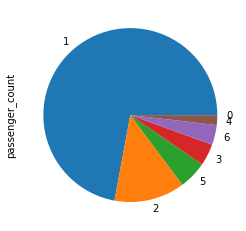

In [398]:
df['passenger_count'].value_counts().plot.pie()

<AxesSubplot:>

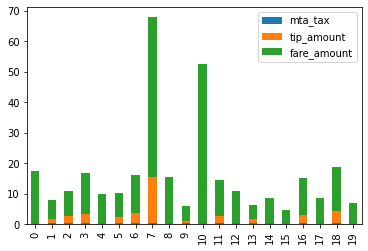

In [401]:
df[:20][['mta_tax', 'tip_amount', 'fare_amount']].plot.bar(stacked=True)

<AxesSubplot:xlabel='passenger_count', ylabel='trip_distance'>

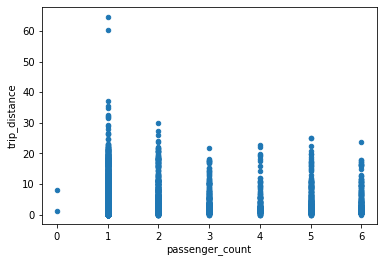

In [402]:
# scatter plot of passenger_count vs. trip_distance

df.plot.scatter(x='passenger_count', y='trip_distance')

<AxesSubplot:xlabel='trip_distance', ylabel='total_amount'>

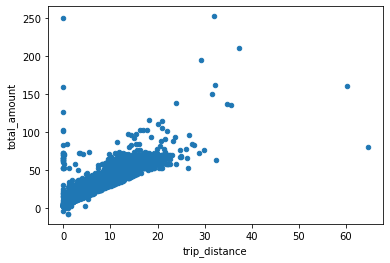

In [403]:
df.plot.scatter(x='trip_distance', y='total_amount')

In [404]:
df.corr()

,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,total_amount
passenger_count,1.000000,0.014365,0.008489,0.008596,-0.014005,0.005953
trip_distance,0.014365,1.000000,0.880674,-0.166809,0.523592,0.880843
fare_amount,0.008489,0.880674,1.000000,-0.286162,0.585051,0.983107
mta_tax,0.008596,-0.166809,-0.286162,1.000000,-0.176778,-0.295329
tip_amount,-0.014005,0.523592,0.585051,-0.176778,1.000000,0.703293
total_amount,0.005953,0.880843,0.983107,-0.295329,0.703293,1.000000


<AxesSubplot:xlabel='trip_distance', ylabel='total_amount'>

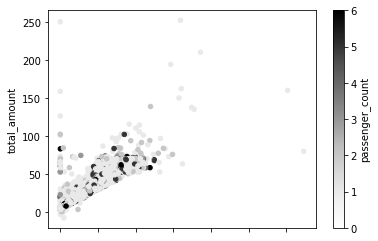

In [405]:
# we can colorize the dots in the scatter plot!
# just pass the parameter c, and a pandas series of the same length as x and y

df.plot.scatter(x='trip_distance', y='total_amount', c='passenger_count')

<AxesSubplot:xlabel='trip_distance', ylabel='total_amount'>

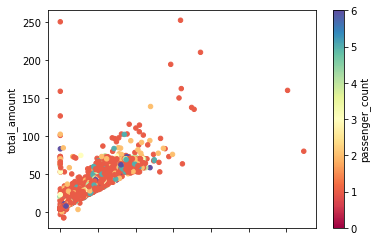

In [406]:
# choose a different colormap for ploat
df.plot.scatter(x='trip_distance', y='total_amount', c='passenger_count', colormap='Spectral')

In [411]:
# dealing with NaN values in pandas
# - fillna
# - dropna

df = DataFrame(np.random.randint(0, 100, [5,5]), 
              index=list('abcde'),
              columns=list('vwxyz'))
df

,v,w,x,y,z
a,29,21,25,80,60
b,61,83,33,32,70
c,85,31,13,71,56
d,24,79,41,18,40
e,54,79,11,38,93


In [412]:
df.loc['c', 'v'] = np.nan
df.loc['e', 'z'] = np.nan
df.loc['a', 'v'] = np.nan
df


,v,w,x,y,z
a,NaN,21,25,80,60.0
b,61.0,83,33,32,70.0
c,NaN,31,13,71,56.0
d,24.0,79,41,18,40.0
e,54.0,79,11,38,NaN


In [413]:
# how can we replace NaN with another value?
# answer: fillna

# if we pass a scalar value to fillna, it'll fill all NaNs with that scalar value.
# if we pass a series, whose index matches ours, then it'll fill each column with the corresponding value.

In [414]:
df

,v,w,x,y,z
a,NaN,21,25,80,60.0
b,61.0,83,33,32,70.0
c,NaN,31,13,71,56.0
d,24.0,79,41,18,40.0
e,54.0,79,11,38,NaN


In [415]:
df.fillna(222)

,v,w,x,y,z
a,222.0,21,25,80,60.0
b,61.0,83,33,32,70.0
c,222.0,31,13,71,56.0
d,24.0,79,41,18,40.0
e,54.0,79,11,38,222.0


In [416]:
df.mean()

v    46.333333
w    58.600000
x    24.600000
y    47.800000
z    56.500000
dtype: float64

In [417]:
df.fillna(df.mean())  

,v,w,x,y,z
a,46.333333,21,25,80,60.0
b,61.000000,83,33,32,70.0
c,46.333333,31,13,71,56.0
d,24.000000,79,41,18,40.0
e,54.000000,79,11,38,56.5


In [418]:
df.fillna(df.median())

,v,w,x,y,z
a,54.0,21,25,80,60.0
b,61.0,83,33,32,70.0
c,54.0,31,13,71,56.0
d,24.0,79,41,18,40.0
e,54.0,79,11,38,58.0


In [419]:
df.fillna(df.mode())

,v,w,x,y,z
a,NaN,21,25,80,60.0
b,61.0,83,33,32,70.0
c,NaN,31,13,71,56.0
d,24.0,79,41,18,40.0
e,54.0,79,11,38,NaN


In [ ]:
# what if I want to get rid of NaN values?

